### CS 4010: Homework 4 

### Due Friday, 10/4/2024

### Create a New iPython (Jupyter) notebook. Name the notebook FirstAndLastName_Homework3 and save it before you start working

### To submit, export or print your notebook as a pdf, with all outputs visible. Upload both the pdf and a copy of your notebook (.ipynb) in Canvas.

### Histograms, Speed and Accuracy.

1) 1-D Histograms

Download the file grades.txt from Canvas. 

The file contains grades from a class with 300 students. Each column are the grades from their exam. Column 0 is MT1, Col1 is MT2 etc... 

A) Create 4 histograms of the students' grades, 1 for each Midterm. 
Use the bins=linspace(0,100,nbins) functionality and adjust the nbins so the histogram isn't too "hairly" or too coarse.

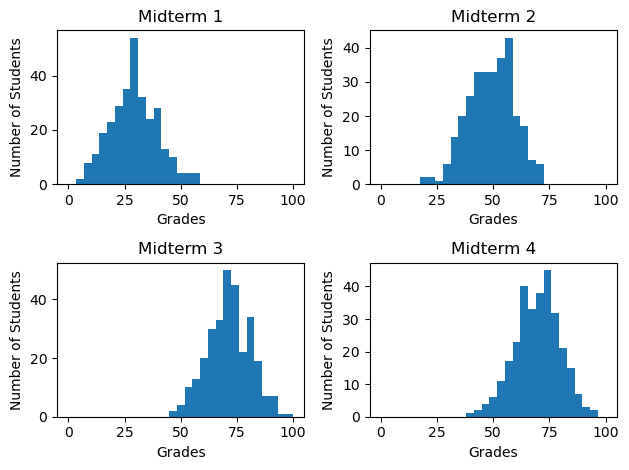

In [115]:
# 1a
import numpy as np
import matplotlib.pyplot as plt

grades = np.loadtxt("grades.txt")

nbins = 30
bins = np.linspace(0, 100, nbins)

fig, axs = plt.subplots(2, 2)

# Midterm 1 histogram
axs[0, 0].hist(grades[:, 0], bins=bins)
axs[0, 0].set_title('Midterm 1')
axs[0, 0].set_xlabel('Grades')
axs[0, 0].set_ylabel('Number of Students')

# Midterm 2 histogram
axs[0, 1].hist(grades[:, 1], bins=bins)
axs[0, 1].set_title('Midterm 2')
axs[0, 1].set_xlabel('Grades')
axs[0, 1].set_ylabel('Number of Students')

# Midterm 3 histogram
axs[1, 0].hist(grades[:, 2], bins=bins)
axs[1, 0].set_title('Midterm 3')
axs[1, 0].set_xlabel('Grades')
axs[1, 0].set_ylabel('Number of Students')

# Midterm 4 histogram
axs[1, 1].hist(grades[:, 3], bins=bins)
axs[1, 1].set_title('Midterm 4')
axs[1, 1].set_xlabel('Grades')
axs[1, 1].set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

B) The hist function will returns 2 lists of values called a tuple, you can save this array by assigning the result to a variable like this for example
    
    h1 = hist(grades[ : , 1])
    
    print(type(h1))

h1[0] is the array of the histogram's y-values. h1[1] are the bin edges of the histogram. 
So the len(h1[1]) will be greater than len(h1[0]) by 1 all the time. This is silly so let's change that to bin center instead.

In [ ]:
# 1b


C) Write a function BinCenter that takes a list of bin edges and returns the bin centers instead. The return list should be 1 element shorter than the original.

D) Use your BinCenter function to change all the h1[1] bin edge list to binCenter lists.

E) Write a function WeightedAvg that computes the weighted average with a given list 
of vals and weights
    
$$Avg = \frac{\sum{ val*weight}}{\sum{weight}}$$

F) Use your BinCenter and WeightedAvg to find the mean of each histogram and see 
if it matches the peaks you see in the histogram.

2) 2-D Histograms

A) Download and load "stars.txt" in your program. Make a 2D Histogram of Magnitude 
of the Stars vs Temperature of the Stars. Choose a 50x50 bins size.

B) Change the color scale to LogNorm instead and add the colorbar to the plot and 
increase the figure size to (12,8)
    
    from matplotlib.colors import LogNorm
    from pylab import colorbar, figure

C) hist2D also returns  the histogram information to you in tuple form, but everything 
is in 2D now!

    h2 = hist2D(stars[:,0],stars[:,1])
    
    print(type(h2))

h2[0] is the NxM array of the values of the histogram.
    
h2[1] is the array of x bin edges
    
h2[2] is the array of y bin edges
    
The bin edges have 1 more elements than the number of bins as usual, but we can use BinCenter to fix that. 
Use BinCenter to save the arrays of the Temperature Bin Center and Magnitude Bin Center.

D) h2[0] is a 2D array so that's harder to deal with. Write a program that loops over the y-axis (Magnitude) of h2[0] and compute the WeightedAvg for each row of x-values (Temperature). Save these values to an array.  
Plot Magnitude vs WeightedAvg Temperature you computed and overlay it with the Histogram.

E) Noticed that your WeightedAvg goes through the top of the Histogram most in 
the bulk but does NOT near the top or bottom. Explain why briefly. 

3) Factorials revisited

For Homework 3, you had to make two different function to calculate factorials.  One used a for loop, and one used a recursive function that called itsself.  

A) Which of these function was faster for calculating large factorials?  (Say, 100!)  You'll needed to use 

    import timeit

or something similar to time the two functions.

B) What is the largest factorial your functions can calculate <b>as a floating point number</b>, before they return infinity?  You might need to modify your factorial function to return a float by setting the initial number (0!) to 1.0 instead of 1